# Traffic sign classifier

## Machine Learning Project: Build a Traffic Sign Classifier

---

This project aims to be a study and a reworking of [this](https://github.com/lfiaschi/udacity-traffic-sign-classifier) notebook.

In [47]:
#Do some logging
import logging, datetime, time
logger = logging.getLogger()

def setup_file_logger(log_file):
    hdlr = logging.FileHandler(log_file)
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
    hdlr.setFormatter(formatter)
    logger.addHandler(hdlr) 
    logger.setLevel(logging.INFO)

def log(message, print_time):
    #outputs to Jupyter console
    if print_time:
        print('{} {}'.format(datetime.datetime.now(), message))
    else:
        print('{}'.format(message))
        
    #outputs to file
    logger.info(message)

setup_file_logger('/logs/{}_training.log'.format(time.strftime("%Y-%m-%d_%H%M")))

---

## Step 0: Load the Dataset

TODO dove abbiamo preso le immagini, perché si è deciso di non utilizzare un dataset già elaborato con pickle

In [48]:
import cv2 # resize the images
import numpy as np
import pandas as pd
import os # to work with directories
import warnings
warnings.filterwarnings('ignore')

DATASET_DIR = '/datasets/GTSRB/Images/'
FINALTEST_DIR = '/datasets/GTSRB/Final_Test/Images/'

ANNOTATION_FILE = '/notebooks/signnames.csv'
FINAL_ANNOTATION_FILE = '/notebooks/GT-final_test.csv'

IMAGE_SIZE = 32
log("image size = {}".format(IMAGE_SIZE), False)
#LR = 1e-3
# MODEL_NAME = 'trafficsigns--{}--{}.model'.format(LR, "2conv-basic")

image size = 32


Load the csv file with the annotations

In [49]:
sign_names_csv = pd.read_csv(ANNOTATION_FILE, delimiter=',', encoding="utf-8-sig")
sign_names_csv.set_index('ClassId', inplace=True)

#final_test_csv = pd.read_csv(FINAL_ANNOTATION_FILE, delimiter=';', encoding="utf-8-sig")
#final_test_csv.set_index('Filename', inplace=True)

#print(sign_names_csv[:5])

def get_name_from_label(label):
    """Return the textual name corresponding to the numeric class id
    
    this functions look for a correspondence between the numeric class id 
    and the textual name of the class.
    
    :param label: the numeric class id
    :type label: int
    :returns: the textual name of the class
    
    :Example:

    >>> get_name_from_label(0)
    Speed limit (20km/h)   
    """    
    
    return sign_names_csv.loc[label].SignName



#def get_label_final_test_image(image_name):
#    """
#    """
    
 #   return final_test_csv.loc[image_name].ClassId

The images are divided into folders based on their category. The *load_dataset* function create a list of all the images labeled with the name of their folder.

In [50]:
def load_dataset_labeled_by_dirs(dataset, path):
    """Load a dataset of images divided by folders
    
    this function look for images on the subfolders of the given path and label 
    them with the name of the folder where the image is stored
    
    :param path: the path where the images divided into folders are stored
    :returns: a numpy array    
    """

    
    
    for subdir, dirs, files in os.walk(path): # all file on the dataset folder
        for file in files: # one image by one
            
            _, file_extension = os.path.splitext(file) # extension control
            if file_extension == '.ppm':
                label = os.path.basename(subdir) # obtain the image label (name of the folder)
                imgPath = os.path.join(path, label, file) # the path of the image
                
                # load image with cv2 library
                img = cv2.resize(cv2.cvtColor(cv2.imread(imgPath), cv2.COLOR_BGR2RGB), (IMAGE_SIZE, IMAGE_SIZE))
                label = int(label) # remove the zeros ahead the name of the folder
                
                dataset['features'].append(np.asarray(img))
                dataset['labels'].append(label)
                       
                
                

def load_dataset_labeled_by_csv(dataset, path, file_csv, delimiter, index_col, label_col):
    """ 
    """

    final_test_csv = pd.read_csv(file_csv, delimiter=delimiter, encoding="utf-8-sig")
    final_test_csv.set_index(index_col, inplace=True)
    
    for subdir, dirs, files in os.walk(path): # all file on the dataset folder
        for file in files: # one image by one
            
            filename, file_extension = os.path.splitext(file) # extension control
            if file_extension == '.ppm':            
                label = final_test_csv.loc[filename + file_extension].ClassId # obtain the image label
                imgPath = os.path.join(path, file) # the path of the image
                
                # load image with cv2 library
                img = cv2.resize(cv2.cvtColor(cv2.imread(imgPath), cv2.COLOR_BGR2RGB), (IMAGE_SIZE, IMAGE_SIZE))
                
                dataset['features'].append(np.asarray(img))
                dataset['labels'].append(label)

---

### Obtain Trainset, Testset and Validset


In [51]:
from sklearn.model_selection import train_test_split

dataset = {}
dataset['features'] = []
dataset['labels'] = []
    
load_dataset_labeled_by_dirs(dataset, DATASET_DIR)
log("Dataset dimension on {} = {}".format(DATASET_DIR, len(dataset['features'])), False)
dataset_dim = len(dataset['features'])
load_dataset_labeled_by_csv(dataset, FINALTEST_DIR, FINAL_ANNOTATION_FILE, ';', 'Filename', 'ClassId')


log("Dataset dimension on {} = {}".format(FINALTEST_DIR, len(dataset['features'])- dataset_dim), False)
log("Final dimension = {}".format(len(dataset['features'])), False)

np.save('dataset.npy', dataset)

X, y = dataset['features'], dataset['labels']
#prende il 70% per il train e il 30% per il vaild
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.2)

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.11)
#X_test, y_test = testset['features'], testset['labels']


# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of testing examples.
n_valid = len(X_valid)

# What's the shape of an traffic sign image?
# image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

log("\tNumber of training examples = {}".format(n_train), False)
log("\tNumber of validation examples = {}".format(n_valid), False)

log("\tNumber of testing examples = {}".format(n_test) , False)

# print("Image data shape =", image_shape)
log("Number of classes = {}".format(n_classes), False)


Dataset dimension on /datasets/GTSRB/Images/ = 39209
Dataset dimension on /datasets/GTSRB/Final_Test/Images/ = 12630
Final dimension = 51839
	Number of training examples = 36287
	Number of validation examples = 3111
	Number of testing examples = 12441
Number of classes = 43


---

## Step 1: Dataset Summary & Exploration

In [6]:
plt.figure(figsize=(10,50))
count = 0
cols = 10
for i in range(100):
    count += 1
    plt.subplot(43, cols, count)
    #plt.imshow(X_train[ii])
    plt.imshow(X_train[i])
    plt.axis('off')

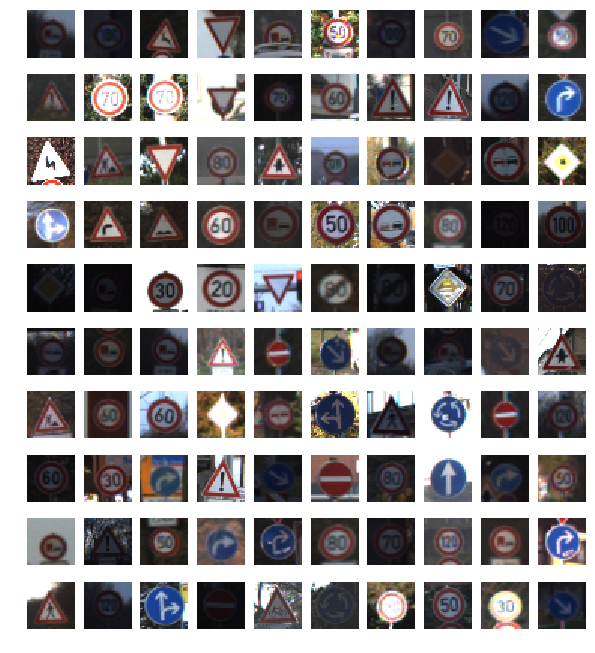

In [7]:
plt.figure(figsize=(10,50))
count = 0
cols = 10
for i in range(100):
    count += 1
    plt.subplot(43, cols, count)
    #plt.imshow(X_train[ii])
    plt.imshow(X_train[i])
    plt.axis('off')

In [9]:
counter = Counter(y_train)

# conta il numero di samples per categoria (min , max , mean)
print("Train example per class mean {} min {} max {}".format(int(np.mean(list(Counter(y_train).values()))),
                                                    np.min(list(Counter(y_train).values())) ,
                                                np.max(list(Counter(y_train).values())) ))
print()
print("Most common signs:")
for el in counter.most_common(10):
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
print()
print("Most rare signs:")
for el in sorted(counter.items(),key=lambda x: x[1])[:10]:
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))

Train example per class mean 843 min 183 max 2098

Most common signs:
'Speed limit (50km/h)'  train samples: 2098
'Speed limit (30km/h)'  train samples: 2040
'Yield'  train samples: 2021
'Priority road'  train samples: 1920
'Keep right'  train samples: 1916
'Speed limit (70km/h)'  train samples: 1873
'No passing for vehicles over 3.5 metric tons'  train samples: 1859
'Speed limit (80km/h)'  train samples: 1758
'Road work'  train samples: 1400
'No passing'  train samples: 1348

Most rare signs:
'Speed limit (20km/h)'  train samples: 183
'Go straight or left'  train samples: 189
'Dangerous curve to the left'  train samples: 192
'End of no passing'  train samples: 200
'End of all speed and passing limits'  train samples: 204
'Pedestrians'  train samples: 207
'End of no passing by vehicles over 3.5 metric tons'  train samples: 237
'Bicycles crossing'  train samples: 259
'Road narrows on the right'  train samples: 268
'Double curve'  train samples: 280


In [10]:
counts = pd.DataFrame(columns=['sign_label','training_samples_count'],data=[(label, count) for label, count in counter.items()])
counts['sign'] = counts.sign_label.apply(get_name_from_label) 

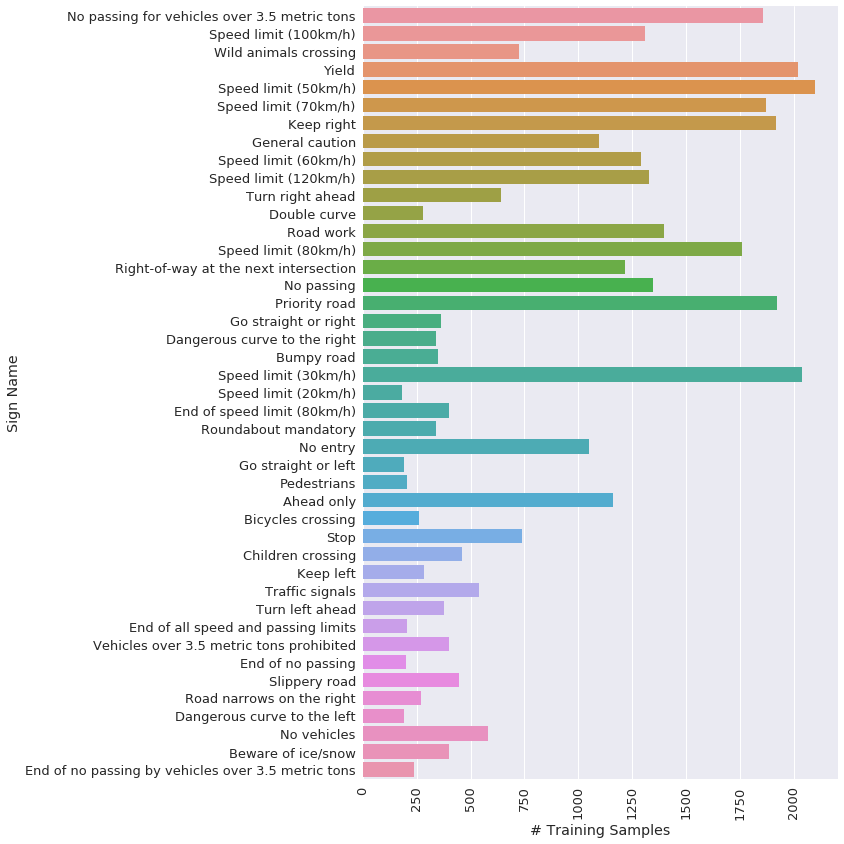

In [11]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
sns.barplot(x='training_samples_count',y='sign',data=counts,orient='V')
plt.xticks(rotation=90)
plt.ylabel('Sign Name')
plt.xlabel('# Training Samples');
plt.tight_layout()

---

## Step 2: Design and Test a Model Architecture


---

### Pre-process the Data Set (normalization, grayscale, etc.)

In [45]:
def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_img(img_in):
    img_in = img_in.copy()
    img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)

    #img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
    
    return img_out[:,:,:]


In [27]:
# Transform all images and augment training data
X_train_transf = list()
y_train_transf = list()
X_test_transf = list()
X_valid_transf = list()
for ii in range(len(X_train)):
    img = X_train[ii]
    label = y_train[ii]
    
    imgout = transform_img(img)
    imgout.shape = imgout.shape + (1,)
    X_train_transf.append(imgout)
    y_train_transf.append(label)

for ii in range(len(X_valid)):
    img = X_valid[ii]
    img = transform_img(img)
    img.shape = img.shape + (1,)
    X_valid_transf.append(img)

for ii in range(len(X_test)):
    img = X_test[ii]
    img = transform_img(img)
    img.shape = img.shape + (1,)
    X_test_transf.append(img)

(32, 32, 3)
(32, 32, 3)


Text(0.5,1,'Augmented Image')

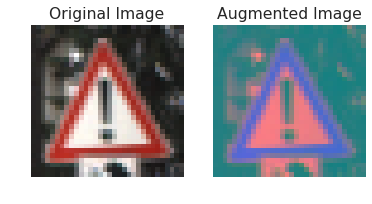

In [46]:
img = X_train[1000]
plt.subplot(1,2,1)
print(img.shape)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
out = transform_img(img)
print(out.shape)
plt.imshow(out)
plt.title('Augmented Image')
#plt.tight_layout()
#plt.savefig('plots/augmented_img_example.png',bbox_inches='tight')



---

### Model Architecture

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    """
    Implement classic lenet architecture in tensorflow
    """
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = (batch_size)x32x32x1. Output = (batch_size)x28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = (batch_size)x28x28x6. Output = (batch_size)x14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = (batch_size)x10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = (batch_size)x10x10x16. Output = (batch_size)x5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SFlatten. Input = (batch_size)x5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)
    
    dr1 = tf.nn.dropout(fc1, keep_prob) 
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    
    dr2 = tf.nn.dropout(fc2, keep_prob) 
    
    #  Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b
    
    return logits

In [15]:
#Definizione dei placeholder 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

#Restituisce un tensore (a valori binari) contenente valori tutti posti a 0 tranne uno.
one_hot_y = tf.one_hot(y, 43)

In [16]:
rate = 0.0001
#Variabili necessarie per la fase di training e di testing

logits = LeNet(x)
log("used net = LeNet", False)
#softmax_cross_entropy_with_logits(_sentinel, labels, logits, dim, name)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

used net = LeNet


In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend( sess.run(predict_proba_operation, feed_dict={x: batch_x, keep_prob: 1.0}))
        
        
    return predicted_proba

Training, Validation and Testing Phases.

---

### Train, Validate and Test the Model

In [18]:
from sklearn.utils import shuffle
from time import time

X_train = X_train_transf
X_valid = X_valid_transf
X_test = X_test_transf
y_train = y_train_transf

#EPOCHS = 150
EPOCHS = 150
BATCH_SIZE = 128
dropout = .3

errors = list()

saver = tf.train.Saver()
start = time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    log("Training... dropout = {} , batch_size = {} , learning rate = {}".format(dropout, BATCH_SIZE, rate), True)
    print()
    for i in range(EPOCHS):
        
        try:
            X_train, y_train = shuffle(X_train, y_train)
#             print("Before Train %d sec"%(time() - start))
            
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1 - dropout})
            
#             print("After Train %d sec"%(time() - start))
            
            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            
            errors.append((training_accuracy,validation_accuracy))
            log("EPOCH %d - %d sec ..."%(i+1, time() - start), True)
            log("Training error = {:.3f} Validation error = {:.3f}".format(1- training_accuracy , 1- validation_accuracy), True)
            
            print()
            
#             print("After error computation %d sec"%(time() - start))
            if i > 5 and i % 3 == 0:
                saver.save(sess, './models/lenet')
                print("Model saved %d sec"%(time() - start))
        except KeyboardInterrupt:
            print('Accuracy Model On Test Images: {}'.format(evaluate(X_test,y_test)))   
            break
            
    saver.save(sess, './models/lenet')

2017-12-30 16:04:03.290879 Training... dropout = 0.3 , batch_size = 128 , learning rate = 0.0001

2017-12-30 16:04:08.325623 EPOCH 1 - 5 sec ...
2017-12-30 16:04:08.326114 Training error = 0.917 Validation error = 0.922

2017-12-30 16:04:11.695283 EPOCH 2 - 8 sec ...
2017-12-30 16:04:11.696033 Training error = 0.826 Validation error = 0.824

2017-12-30 16:04:15.040960 EPOCH 3 - 12 sec ...
2017-12-30 16:04:15.041637 Training error = 0.732 Validation error = 0.732

2017-12-30 16:04:18.403736 EPOCH 4 - 15 sec ...
2017-12-30 16:04:18.404293 Training error = 0.653 Validation error = 0.654

2017-12-30 16:04:21.760543 EPOCH 5 - 18 sec ...
2017-12-30 16:04:21.761152 Training error = 0.573 Validation error = 0.570

2017-12-30 16:04:25.121442 EPOCH 6 - 22 sec ...
2017-12-30 16:04:25.122851 Training error = 0.510 Validation error = 0.509

2017-12-30 16:04:28.436277 EPOCH 7 - 25 sec ...
2017-12-30 16:04:28.436821 Training error = 0.463 Validation error = 0.460

Model saved 25 sec
2017-12-30 16:04:

2017-12-30 16:07:39.382742 EPOCH 63 - 216 sec ...
2017-12-30 16:07:39.383309 Training error = 0.042 Validation error = 0.075

2017-12-30 16:07:42.766439 EPOCH 64 - 219 sec ...
2017-12-30 16:07:42.767051 Training error = 0.041 Validation error = 0.071

Model saved 219 sec
2017-12-30 16:07:46.133306 EPOCH 65 - 223 sec ...
2017-12-30 16:07:46.133815 Training error = 0.040 Validation error = 0.071

2017-12-30 16:07:49.517107 EPOCH 66 - 226 sec ...
2017-12-30 16:07:49.517868 Training error = 0.038 Validation error = 0.069

2017-12-30 16:07:52.869773 EPOCH 67 - 230 sec ...
2017-12-30 16:07:52.870386 Training error = 0.037 Validation error = 0.068

Model saved 230 sec
2017-12-30 16:07:56.335977 EPOCH 68 - 233 sec ...
2017-12-30 16:07:56.336712 Training error = 0.037 Validation error = 0.065

2017-12-30 16:07:59.749829 EPOCH 69 - 236 sec ...
2017-12-30 16:07:59.750347 Training error = 0.035 Validation error = 0.069

2017-12-30 16:08:03.117174 EPOCH 70 - 240 sec ...
2017-12-30 16:08:03.117872 T

2017-12-30 16:11:09.412387 EPOCH 125 - 426 sec ...
2017-12-30 16:11:09.412834 Training error = 0.009 Validation error = 0.040

2017-12-30 16:11:12.778539 EPOCH 126 - 429 sec ...
2017-12-30 16:11:12.779162 Training error = 0.009 Validation error = 0.040

2017-12-30 16:11:16.129233 EPOCH 127 - 433 sec ...
2017-12-30 16:11:16.129875 Training error = 0.008 Validation error = 0.038

Model saved 433 sec
2017-12-30 16:11:19.545769 EPOCH 128 - 436 sec ...
2017-12-30 16:11:19.546429 Training error = 0.009 Validation error = 0.042

2017-12-30 16:11:22.915898 EPOCH 129 - 440 sec ...
2017-12-30 16:11:22.916532 Training error = 0.008 Validation error = 0.042

2017-12-30 16:11:26.282641 EPOCH 130 - 443 sec ...
2017-12-30 16:11:26.283211 Training error = 0.008 Validation error = 0.040

Model saved 443 sec
2017-12-30 16:11:29.768562 EPOCH 131 - 446 sec ...
2017-12-30 16:11:29.769245 Training error = 0.007 Validation error = 0.041

2017-12-30 16:11:33.164371 EPOCH 132 - 450 sec ...
2017-12-30 16:11:33.

In [20]:
#Printing accuracy of the model on Training, validation and Testing set.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    log("", False)
    log('Accuracy Model On Training Images: {:.3f}'.format(evaluate(X_train, y_train)), False)
    log('Accuracy Model On Validation Images: {:.3f}'.format(evaluate(X_valid, y_valid)), False) 
    log('Accuracy Model On Test Images: {:.3f}'.format(evaluate(X_test, y_test)), False) 

INFO:tensorflow:Restoring parameters from ./models/lenet

Accuracy Model On Training Images: 0.995
Accuracy Model On Validation Images: 0.961
Accuracy Model On Test Images: 0.965


Next work --> Text model on new images